## Tutorial: cot.PlotGIF

In [8]:
import numpy as np
import cot
from IPython.display import display

Set up the math environment. In this case, we want to create a GIF showing a sinkhorn solution with moving marginals.

In [9]:
interval = np.linspace(0, 10, 50, dtype='float32')

# first marginal - constant
A = cot.discrete_gaussian(7, 0.5, interval)

# second marginal - moving
MU = [cot.discrete_gaussian(i, 0.5, interval) for i in np.linspace(3, 8, 21)]

C = cot.construct_tensor(interval, 2, lambda x, y: (x - y) ** 2)

First, create a `PlotGIF` object. Then, run your calculations as usual. Every time you want to add a frame to the GIF, call the `stamp()` method. Finally, use `save()` to save a GIF file to disk.

In [10]:
# 1. create gif object
gif = cot.PlotGIF()

# iterate through the moving marginal
for frame in MU:

    # solves and plots solution onto figure 1
    sol = cot.dual_sinkhorn([A, frame], C, 0.01)
    cot.plot_matrix(A, frame, sol, fig=1)

    # 2. adds figure 1 into gif as a new frame
    gif.stamp(fig=1)

# 3. save to disk as a 3 second GIF
gif.save("test.gif", 3)

<Figure size 500x500 with 0 Axes>

`PlotGIF` also supports generators and slicing.

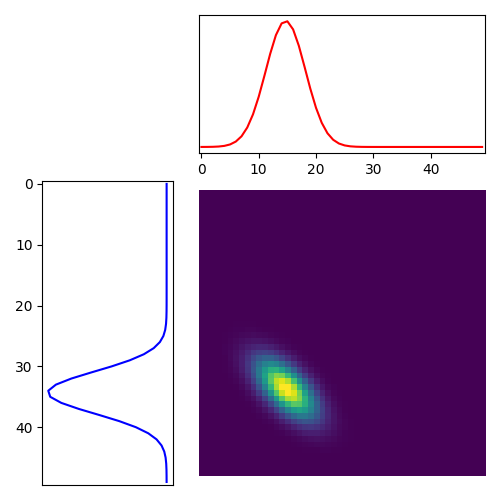

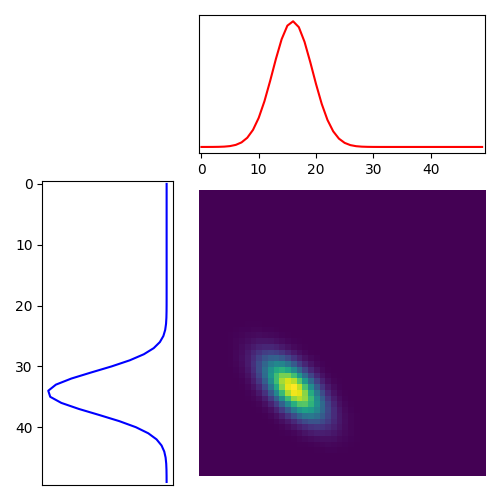

In [11]:
# show first 2 frames

for frame in gif[:2]:
    display(frame)

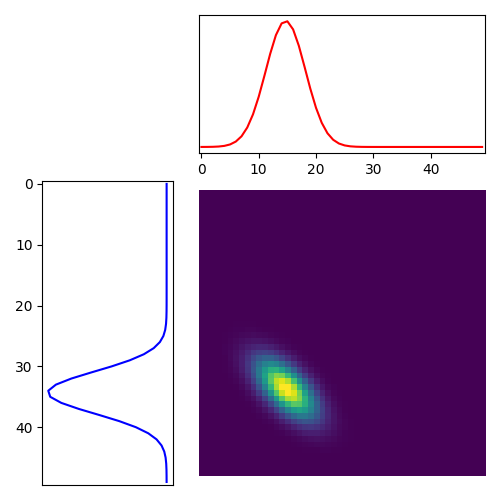

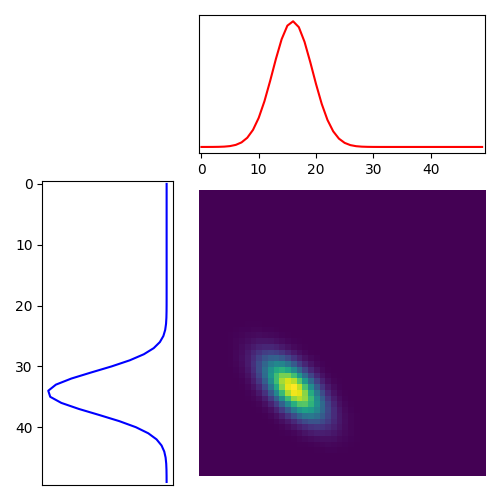

In [12]:
# Alternatively

for i in range(2):
    gif.show(i)

Finally, saved frames can be changed.

In [13]:
# remove last 2 frames

for i in range(2):
    gif.pop()

# move last frame to beginning

gif.get_frames().insert(0, gif.get_frames().pop())

# remove all frames

gif.clear()

print(len(gif), gif.length())

0 0
